<a href="https://colab.research.google.com/github/TrungChinh-byte/FakeNewsDetection/blob/main/FAKE_NEWS_DETECTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FAKE NEWS DETECTION**

##**Problem stament :**     

The widespread dissemination of fake news and propaganda presents serious societal risks, including the erosion of public trust, political polarization, manipulation of elections, and the spread of harmful misinformation during crises such as pandemics or conflicts. From an NLP perspective, detecting fake news is fraught with challenges. Linguistically, fake news often mimics the tone and structure of legitimate journalism, making it difficult to distinguish using surface-level features. The absence of reliable and up-to-date labeled datasets, especially across multiple languages and regions, hampers the effectiveness of supervised learning models. Additionally, the dynamic and adversarial nature of misinformation means that malicious actors constantly evolve their language and strategies to bypass detection systems. Cultural context, sarcasm, satire, and implicit bias further complicate automated analysis. Moreover, NLP models risk amplifying biases present in training data, leading to unfair classifications and potential censorship of legitimate content. These challenges underscore the need for cautious, context-aware approaches, as the failure to address them can inadvertently contribute to misinformation, rather than mitigate it.



Datasets in link : https://drive.google.com/drive/folders/1mrX3vPKhEzxG96OCPpCeh9F8m_QKCM4z?usp=sharing


## **About dataset:**

* **True Articles**:

  * **File**: `MisinfoSuperset_TRUE.csv`
  * **Sources**:

    * Reputable media outlets like **Reuters**, **The New York Times**, **The Washington Post**, etc.

* **Fake/Misinformation/Propaganda Articles**:

  * **File**: `MisinfoSuperset_FAKE.csv`
  * **Sources**:

    * **American right-wing extremist websites** (e.g., Redflag Newsdesk, Breitbart, Truth Broadcast Network)
    * **Public dataset** from:

      * Ahmed, H., Traore, I., & Saad, S. (2017): "Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques" *(Springer LNCS 10618)*



## **Summary**

1. **Data Preprocessing**: Clean and prepare the dataset,etc.

2. **Exploratory Data Analysis (EDA)**: Explore and visualize the data.

3. **SVC - XGBoost Model**: Using SVC, XGBoost to solve the classification problem of given dataset.

4. **RNN - Model Building**: Building the LSTM Model (Recurrent Neural Network - RNN).

5. **Hyperparameter set up**: Set and adjust the model's hyperparameters using appropriate methods to improve performance.

6. **Model Training**: Train the model(s) on the training dataset.

7. **Performance Evaluation**: Evaluate the trained model(s) using appropriate metrics (e.g., accuracy, precision, recall, F1-score, confusion matrix, etc.) and validate their performance on unseen data.

8. **Conclusion**: Summarize the results.





## 1. **Data Preprocessing**:

### Loading Dataset
- I combined two distinct datasets into a single dataset, labeling true articles as 1 and fake articles as 0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 1

In [ ]:
true_df = pd.read_csv('/content/DataSet_Misinfo_TRUE.csv')
fake_df = pd.read_csv('/content/DataSet_Misinfo_FAKE.csv')

In [ ]:
true_df.drop(['Unnamed: 0'], axis=1, inplace=True)
true_df['label'] = 1
true_df.head()

,text,label
0,The head of a conservative Republican faction ...,1
1,Transgender people will be allowed for the fir...,1
2,The special counsel investigation of links bet...,1
3,Trump campaign adviser George Papadopoulos tol...,1
4,President Donald Trump called on the U.S. Post...,1


In [ ]:
fake_df.drop(['Unnamed: 0'], axis=1, inplace=True)
fake_df['label'] = 0
fake_df.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


-  Then, I removed any rows with missing values.

In [ ]:
df = shuffle(pd.concat([true_df, fake_df]), random_state = RANDOM_STATE).reset_index(drop=True)
print(f"Counts of Null rows: \n {df.isnull().sum()}")

df.dropna(inplace = True)
df.info()

Counts of Null rows: 
 text     29
label     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 78588 entries, 0 to 78616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    78588 non-null  object
 1   label   78588 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


### Cleaning text
- I used stemming and removed stopwords, as well as unusual words such as URLs and special tokens.

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
import re

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
re_tokenizer = RegexpTokenizer(r'\w+')
stopwords_english = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_sentence(sentence):
    sentence = sentence.lower()  # Convert to lowercase
    sentence = re.sub('\[.*?\]', '', sentence)  # Remove square brackets
    sentence = re.sub("\\W", " ", sentence)  # Remove non-word characters
    sentence = re.sub('https?://\S+|www\.\S+', '', sentence)  # Remove URLs
    sentence = re.sub('<.*?>+', '', sentence)  # Remove HTML tags
    sentence = re.sub('\n', '', sentence)  # Remove newlines
    sentence = re.sub('\w*\d\w*', '', sentence)  # Remove words containing numbers

    tokens = re_tokenizer.tokenize(sentence)
    return [
        stemmer.stem(word)
        for word in tokens
        if word not in stopwords_english
    ]

def clean_article(article):
    result = []
    for sentence in sent_tokenize(article):
        result.extend(clean_sentence(sentence))
    return result

df['token_text'] = df['text'].apply(clean_article)

## 2. **Exploratory Data Analysis (EDA)**:

- Countplot for a label column

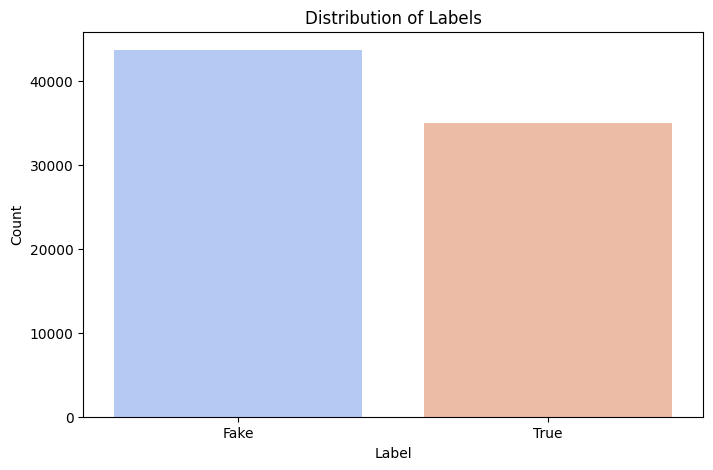

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x = 'label', data = df, palette='coolwarm')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.xticks([0, 1], ['Fake', 'True'])
plt.ylabel('Count')
plt.show()

- Histogram of text lengths shows the distribution of article lengths across the dataset.

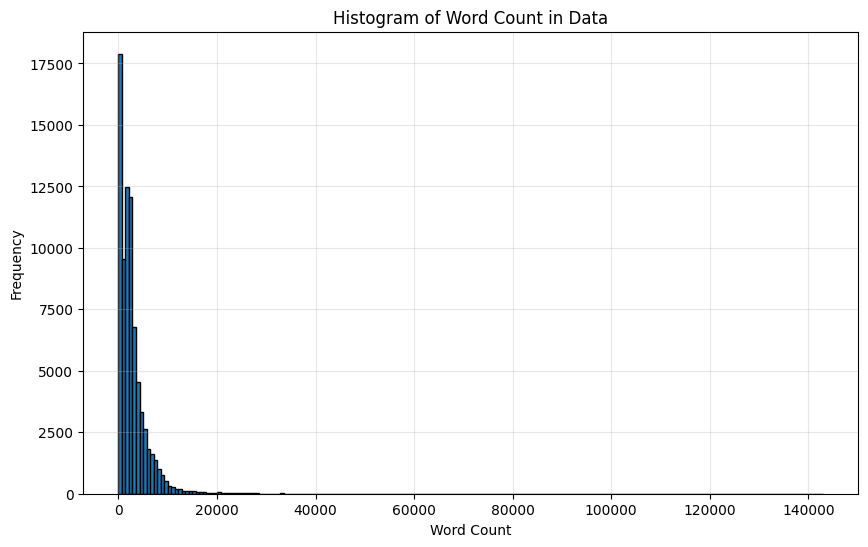

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist([len(x) for x in df['text']], bins = 200, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count in Data')
plt.grid(True, alpha=0.3)
plt.show()

- Most apperance of word in true and fake article

As you can see below, the word "Trump" appears most frequently in both true and fake articles. Interestingly, President Trump seems to be showing up everywhere, regardless of whether the news is real or fake :).

In [ ]:
from collections import Counter

def get_most_common_words(text_list, n):
    words = []
    for tokens in text_list:
        words.extend(tokens)
    word_counts = Counter(words)
    return word_counts.most_common(n)

true_words = get_most_common_words(df[df['label'] == 0]['token_text'].values, 20)
fake_words = get_most_common_words(df[df['label'] == 1]['token_text'].values, 20)

true_words_df = pd.DataFrame(true_words, columns=['word', 'count'])
fake_words_df = pd.DataFrame(fake_words, columns=['word', 'count'])

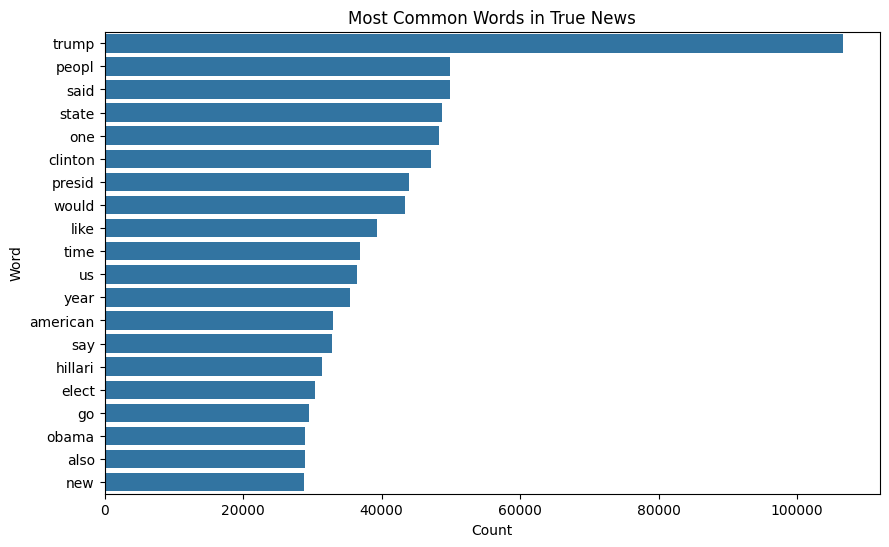

In [ ]:
# Create bar plots for most common words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=true_words_df)
plt.title('Most Common Words in True News')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

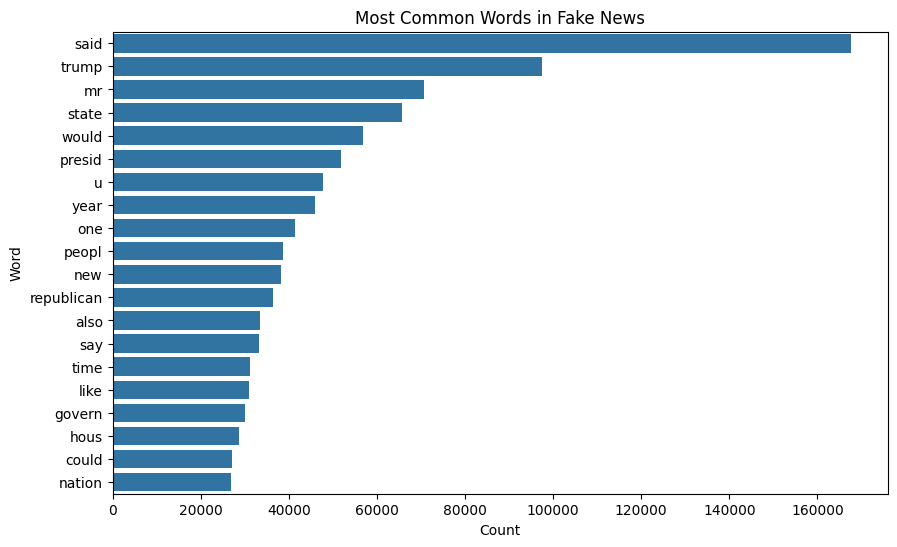

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=fake_words_df)
plt.title('Most Common Words in Fake News')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

- Histogram of tokenized text lengths

Which is useful for determining an appropriate padding size for model training session.

20917
0
270


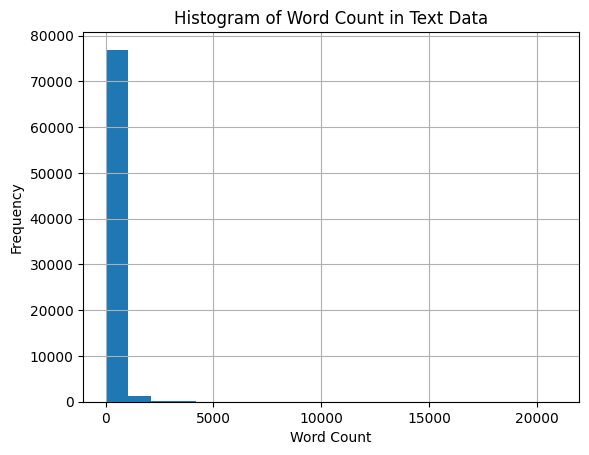

In [ ]:
len_X_tokenize = [len(x) for x in df['token_text'].values]

print(max(len_X_tokenize))
print(min(len_X_tokenize))
print(round(np.mean(len_X_tokenize)))

plt.hist(len_X_tokenize, bins= 20)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count in Text Data')
plt.grid(True)
plt.show()

In [ ]:
most_text_len = [x < 1000 for x in len_X_tokenize]
print(f"Text has length under 1000 words : {sum(most_text_len)}")
print(f"Number of total text : {len(len_X_tokenize)}")
print(f"Ratio : {(sum(most_text_len) / len(len_X_tokenize) * 100):.2f} %")

Text has length under 1000 words : 76771
Number of total text : 78588
Ratio : 97.69 %


## 3. **SVC - XGBoost Model**:

- Prepare the data:
  - Train-Test Split: The dataset was split into training and testing sets to evaluate model performance during the training phase.

  - Text Representation: I used TfidfVectorizer to transform text into numerical feature vectors. This word represention technique captures the importance of words across documents.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X_tokenize = df['token_text'].values
X = [' '.join(x) for x in X_tokenize]
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

# Initialize TfidfVectorizer
# You can experiment with parameters like max_features, ngram_range, stop_words etc.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit the vectorizer on the training data and transform both train and test data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_train_tfidf: (62870, 5000)
Shape of X_test_tfidf: (15718, 5000)


- Support Vector Machine (SVC)

In [ ]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Đánh giá mô hình
y_pred = linear_svc.predict(X_test_tfidf)
print("Linear SVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['True', 'Fake']))

Linear SVC Results:
Accuracy: 0.9393052551215167
Confusion Matrix:
[[8204  484]
 [ 470 6560]]
              precision    recall  f1-score   support

        True       0.95      0.94      0.95      8688
        Fake       0.93      0.93      0.93      7030

    accuracy                           0.94     15718
   macro avg       0.94      0.94      0.94     15718
weighted avg       0.94      0.94      0.94     15718



- XGBoost Model

In [ ]:
from xgboost import XGBClassifier


xgb_model = XGBClassifier(objective='binary:logistic',
                          eval_metric='logloss',
                          use_label_encoder=False,
                          random_state=42)


xgb_model.fit(X_train_tfidf, y_train)

y_pred = xgb_model.predict(X_test_tfidf)
print("\nXGBoost Results :")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['True', 'Fake']))


XGBoost Results :
Accuracy: 0.9477032701361496
Confusion Matrix:
[[8319  369]
 [ 453 6577]]
              precision    recall  f1-score   support

        True       0.95      0.96      0.95      8688
        Fake       0.95      0.94      0.94      7030

    accuracy                           0.95     15718
   macro avg       0.95      0.95      0.95     15718
weighted avg       0.95      0.95      0.95     15718



## 4. **RNN - Model Building**:

- Data Preparation
  - Tokenization: I used the Tokenizer from tensorflow.keras.preprocessing.text to transform each text into a sequence of numbers, where each number represents a word in the vocabulary.

  - Padding: I used pad_sequences to ensure uniform input lengths for all tokenized_text

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

In [ ]:
X_tokenize = df['token_text'].values
y = df['label'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_tokenize)

with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# According to the length of tokenize_text histogram, I used maxlen = 1000
X_to_seq = tokenizer.texts_to_sequences(X_tokenize)
X  =  pad_sequences(X_to_seq, maxlen = 1000, padding='post')

- Building Pre_train embedding matrix:
  - To save training time and computational resources, I used pre-trained word embeddings provided by SpaCy.

  - Embeddings matrix is used to initialize the embedding layer in our RNN model, create semantic representations of words.

In [ ]:
#!python -m spacy download en_core_web_lg

import spacy
nlp = spacy.load("en_core_web_sm")

print(len(nlp('hihi').vector))
print(nlp('hihi').vector)

96
[-0.8065487  -0.6003126   0.12933397  0.31953967  0.45416236 -0.4452542
  0.9377103   0.9104416  -0.7108599   0.26936716  1.3354512  -0.41846532
 -0.80232537 -0.40462142 -0.44315508  0.7921235  -0.80240077 -0.05600697
  0.8197495  -1.0906345  -0.4822933   0.35827392 -0.72826266  0.16038938
  0.32068413  0.31131482  1.4588704  -0.02827361 -0.85481703  0.7302246
 -0.18364504  0.82469463 -0.1643664   0.28132826 -1.0584749  -1.2489892
  0.14562583  1.8613045  -0.5338464   0.02979809 -0.84199905 -0.17525208
  0.16358793 -0.26217926  0.3180539  -0.23944882  0.45430607 -0.46923858
 -1.071565   -0.58500254  0.42058384  0.19763409 -0.63432074 -0.79363835
  0.51851475 -0.27989352  0.71346295  0.1871201   0.18756378  0.3648195
 -1.1430688   0.25486982 -0.18286252 -0.8194812   0.01245007  0.7184929
 -0.01709916  0.24378717 -1.0131514  -0.22572117  0.02815036  1.3482662
  1.2896506   0.7242564   0.07999021 -0.64380264  0.10995874 -0.46442616
 -0.75015855 -0.05766013 -0.1561332   0.13619605 -0.44

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embeddims = 300

def embed_matrix(nlp, word_index, vocab_size, embedding_dim = embeddims):
    weight_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in word_index.items():
        if nlp.vocab.has_vector(word):
            weight_matrix[i] = nlp(word).vector[:embedding_dim]
        else:
            weight_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))  ## if not exsists then random the values of weights

    return weight_matrix

embedding_weights = embed_matrix(nlp, word_index, vocab_size)

embedding_weights.shape


- Create Train-Validation-Test Dataloader

In [ ]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        # Convert X, y về tensor nếu chưa phải
        return torch.LongTensor(self.X[index]), torch.tensor(self.y[index], dtype=torch.float)

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.05, random_state=RANDOM_STATE)
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.1, random_state=RANDOM_STATE)

train_loader = DataLoader(TextDataset(trainX, trainY), batch_size = 16, shuffle = True)
val_loader = DataLoader(TextDataset(valX, valY), batch_size = 16, shuffle = True)
test_loader = DataLoader(TextDataset(testX, testY), batch_size = 16)

- Building RNN Model:
  - Embedding Layer :
    - Transform word indices into vectors (word embeddings).

    - input_shape: (batch_size, sequence_length)

    - output_shape: (batch_size, sequence_length, embedding_dim)

  - LSTM Layer:
    - Want to keep the final hidden state of the full sequence.
    
    - input_shape: (batch_size, sequence_length, embedding_dim)

    - output_shape: (batch_size, hidden_dim)

  - Fully Connected Layer:
    - Using final hidden state to produce the output.

    - input_shape: (batch_size, hidden_dim)

    - output_shape: (batch_size, 1)

  - Output:
    - Sigmoid value for binary-classificaion.
    
    - input_shape: (batch_size, 1)

    - output_shape: (batch_size, 1)


In [ ]:
import torch
import torch.nn as nn

class RNN_model(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, embedding_weights):
        super(RNN_model, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.tensor(embedding_weights, dtype=torch.float32), freeze = True)
        self.lstm = nn.LSTM(input_size=embedding_dim,
                            hidden_size=hidden_dim,
                            batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        _, (hidden, _) = self.lstm(embedded)
        out = self.fc(hidden.squeeze(0))
        return torch.sigmoid(out)


## 5. **Hyperparameter set up**:

In [ ]:
rnn_model = RNN_model(vocab_size,
                      embedding_dim = embeddims, # = 300
                      hidden_dim = 128,
                      output_dim = 1,
                      embedding_weights = embedding_weights)

criterion = nn.BCELoss() ## using BCELoss for binary classification
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=1e-3) # Adam with learning_rate = 0.001

## 6. **Model Training**::

In [ ]:
from tqdm.auto import tqdm
from sklearn.metrics import f1_score, accuracy_score, classification_report

def train_model(model, train_loader, optimizer, device, epoch):
    model.train()
    epoch_loss = 0

    model.zero_grad()

    for batch in tqdm(train_loader, desc = f"Training Epoch {epoch+1}"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze(1)
        loss = criterion(outputs, labels)

        epoch_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_train_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1} : \n Train loss: {avg_train_loss:.4f}")

    return avg_train_loss


def validation_model(model, val_loader, device):
    model.eval() # with no update parameter
    all_preds = []
    all_labels = []
    epoch_loss = 0

    # with no update parameter
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).squeeze(1)
            loss = criterion(outputs, labels)

            epoch_loss += loss.item()

            preds = (outputs >= 0.5)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_val_loss = epoch_loss / len(val_loader)

    avg_f1 = f1_score(all_labels, all_preds)
    acc = accuracy_score(all_labels, all_preds)

    print(f" Validation loss: {avg_val_loss:.4f}")
    print(f" Validation F1-score: {avg_f1:.4f} - Accuraccy: {acc:.4f}\n")
    return avg_val_loss, avg_f1, acc


def test_model(model, test_loader, device):
    model.eval() # with no update parameter
    all_preds = []
    all_labels = []
    epoch_loss = 0

    # with no update parameter
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs).squeeze(1)
            preds = (outputs >= 0.5)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print(classification_report(all_labels, all_preds))
    print("Test results :")
    print("Accuracy:", accuracy_score(all_labels, all_preds))
    print("F1 Score:", f1_score(all_labels, all_preds))

In [ ]:
num_epochs = 20

history = {
    'train_loss': [],
    'val_loss': []
}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
rnn_model.to(device)

for epoch in range(num_epochs):

  train_loss = train_model(rnn_model,train_loader, optimizer, device, epoch)
  val_loss = validation_model(rnn_model, val_loader, device)

  history['train_loss'].append(train_loss)
  history['val_loss'].append(val_loss)

Training Epoch 1:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 1 : 
 Train loss: 0.6568
 Validation loss: 0.6252
 Validation F1-score: 0.6533 - Accuraccy: 0.6598



Training Epoch 2:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 2 : 
 Train loss: 0.6259
 Validation loss: 0.6167
 Validation F1-score: 0.6095 - Accuraccy: 0.6907



Training Epoch 3:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 3 : 
 Train loss: 0.5524
 Validation loss: 0.4056
 Validation F1-score: 0.8030 - Accuraccy: 0.8334



Training Epoch 4:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 4 : 
 Train loss: 0.3748
 Validation loss: 0.3493
 Validation F1-score: 0.8386 - Accuraccy: 0.8624



Training Epoch 5:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 5 : 
 Train loss: 0.3146
 Validation loss: 0.2780
 Validation F1-score: 0.8755 - Accuraccy: 0.8892



Training Epoch 6:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 6 : 
 Train loss: 0.2357
 Validation loss: 0.1901
 Validation F1-score: 0.9163 - Accuraccy: 0.9282



Training Epoch 7:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 7 : 
 Train loss: 0.1570
 Validation loss: 0.1543
 Validation F1-score: 0.9374 - Accuraccy: 0.9456



Training Epoch 8:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 8 : 
 Train loss: 0.1059
 Validation loss: 0.1304
 Validation F1-score: 0.9467 - Accuraccy: 0.9537



Training Epoch 9:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 9 : 
 Train loss: 0.0719
 Validation loss: 0.1276
 Validation F1-score: 0.9501 - Accuraccy: 0.9559



Training Epoch 10:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 10 : 
 Train loss: 0.0512
 Validation loss: 0.1460
 Validation F1-score: 0.9461 - Accuraccy: 0.9538



Training Epoch 11:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 11 : 
 Train loss: 0.0403
 Validation loss: 0.1294
 Validation F1-score: 0.9558 - Accuraccy: 0.9613



Training Epoch 12:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 12 : 
 Train loss: 0.0340
 Validation loss: 0.1665
 Validation F1-score: 0.9440 - Accuraccy: 0.9526



Training Epoch 13:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 13 : 
 Train loss: 0.0298
 Validation loss: 0.1444
 Validation F1-score: 0.9554 - Accuraccy: 0.9610



Training Epoch 14:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 14 : 
 Train loss: 0.0252
 Validation loss: 0.1424
 Validation F1-score: 0.9543 - Accuraccy: 0.9602



Training Epoch 15:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 15 : 
 Train loss: 0.0220
 Validation loss: 0.1513
 Validation F1-score: 0.9557 - Accuraccy: 0.9614



Training Epoch 16:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 16 : 
 Train loss: 0.0213
 Validation loss: 0.1500
 Validation F1-score: 0.9556 - Accuraccy: 0.9614



Training Epoch 17:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 17 : 
 Train loss: 0.0192
 Validation loss: 0.1402
 Validation F1-score: 0.9550 - Accuraccy: 0.9605



Training Epoch 18:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 18 : 
 Train loss: 0.0179
 Validation loss: 0.1421
 Validation F1-score: 0.9589 - Accuraccy: 0.9641



Training Epoch 19:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 19 : 
 Train loss: 0.0170
 Validation loss: 0.1725
 Validation F1-score: 0.9546 - Accuraccy: 0.9602



Training Epoch 20:   0%|          | 0/4200 [00:00<?, ?it/s]

Epoch 20 : 
 Train loss: 0.0157
 Validation loss: 0.1746
 Validation F1-score: 0.9547 - Accuraccy: 0.9610



## 7.**Performance Evaluation**

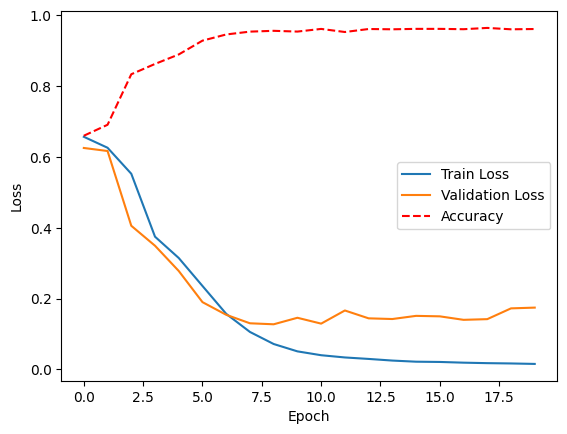

In [ ]:
plt.plot(history['train_loss'], label='Train Loss')
plt.plot([i[0] for i in history['val_loss']], label='Validation Loss')
plt.plot([i[2] for i in history['val_loss']],'--r' ,label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_model(model = rnn_model,test_loader=test_loader, device=device)

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      4204
         1.0       0.97      0.94      0.95      3262

    accuracy                           0.96      7466
   macro avg       0.96      0.96      0.96      7466
weighted avg       0.96      0.96      0.96      7466

Test results :
Accuracy: 0.9610233056522904
F1 Score: 0.9546517064048621


- Inference: To evaluate the effectiveness of the trained model I use two sample articles:

  - True News Article:
    - A real article from The New York Times about a plane crash in India.
    - The real article provides factual reporting, detailed information.

  - Fake News Article:
    - A humorous  article written by a friend.
    - The content is brief, lacks detail, and does not include factual information.

In [ ]:
## New york time article
true_article = 'The flight data recorder has been recovered and should shed some light on the cause of the disaster, which killed at least 270 people. Indian authorities said they had found the flight data recorder of the Air India plane that crashed, killing hundreds of people, as teams at the site continued to sift through wreckage on Saturday.'
## My friend fake news
fake_article = 'Putin is the president of The United States'

In [ ]:
def inference(article, model, device = 'cpu'):
  default_article = article

  with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

  article = clean_article(article)
  article = tokenizer.texts_to_sequences([article])
  article = pad_sequences(article, maxlen = 1000, padding='post')

  article = torch.LongTensor(article)

  model.to(device)

  outputs = model(article)
  print(outputs)
  preds = (outputs >= 0.5)


  print(f"Article : \n {default_article}")
  print(f"=> Conclusion : this article is {'true' if preds else 'fake'} article")

In [ ]:
inference(true_article, rnn_model)

tensor([[0.9954]], grad_fn=<SigmoidBackward0>)
Article : 
 The flight data recorder has been recovered and should shed some light on the cause of the disaster, which killed at least 270 people. Indian authorities said they had found the flight data recorder of the Air India plane that crashed, killing hundreds of people, as teams at the site continued to sift through wreckage on Saturday.
=> Conclusion : this article is true article


In [ ]:
inference(fake_article, rnn_model)

tensor([[0.0002]], grad_fn=<SigmoidBackward0>)
Article : 
 Putin is the president of The United States
=> Conclusion : this article is fake article


## 8.**Conclusion**
- The accuracy of each model:

| Model  | Accuracy | F1-Score |
|-------|-----|-------|
| SVC    | 0.94  | 0.94  |
| XGBoost  | 0.95  |0.95  |
| LSTM-RNN | 0.961  | 0.955  |

- With ability to learnthe sequential structure of the sentence, RNN model perform best of three models.

- The RNN model successfully predicts the real article as "True" and the fake article as "Fake", demonstrating its capability to deal with unseen text. This indicates that the model has learned to identify semantic and syntactic of the sentence for classification.